In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1.Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly.

In [5]:
# Read the CSV files
customers = pd.read_csv("Customer.csv")
transactions = pd.read_csv("Transactions.csv")
prod_cat_info = pd.read_csv("prod_cat_info.csv")

# Merge the datasets
customer_final = pd.merge(transactions, customers, how="inner", left_on="cust_id", right_on="customer_Id")
customer_final = pd.merge(customer_final, prod_cat_info, how="left", left_on="prod_cat_code", right_on="prod_cat_code")

# Print the merged dataset
print(customer_final)


       transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  \
0         80712190438   270351  28-02-2014                 1              1   
1         80712190438   270351  28-02-2014                 1              1   
2         80712190438   270351  28-02-2014                 1              1   
3         80712190438   270351  20-02-2014                 1              1   
4         80712190438   270351  20-02-2014                 1              1   
...               ...      ...         ...               ...            ...   
99288     58531412371   274935  29-01-2011                10              5   
99289     58531412371   274935  29-01-2011                10              5   
99290     58531412371   274935  29-01-2011                10              5   
99291     83245680995   273723  26-01-2011                 4              4   
99292     83245680995   273723  26-01-2011                 4              4   

       Qty  Rate     Tax  total_amt      Store_type

2a. Get the column names and their corresponding data types

In [7]:
# Get column names and data types
column_names = customer_final.columns
data_types = customer_final.dtypes

# Print column names and data types
for column, dtype in zip(column_names, data_types):
    print(column, "-", dtype)

transaction_id - int64
cust_id - int64
tran_date - object
prod_subcat_code - int64
prod_cat_code - int64
Qty - int64
Rate - int64
Tax - float64
total_amt - float64
Store_type - object
customer_Id - int64
DOB - object
Gender - object
city_code - float64
prod_cat - object
prod_sub_cat_code - int64
prod_subcat - object


2b. Top/Bottom 10 observations

In [8]:
# Get top 10 observations
top_10 = customer_final.head(10)
# Get bottom 10 observations
bottom_10 = customer_final.tail(10)
# Print top 10 and bottom 10 observations
print(top_10)
print(bottom_10)

   transaction_id  cust_id   tran_date  prod_subcat_code  prod_cat_code  Qty  \
0     80712190438   270351  28-02-2014                 1              1   -5   
1     80712190438   270351  28-02-2014                 1              1   -5   
2     80712190438   270351  28-02-2014                 1              1   -5   
3     80712190438   270351  20-02-2014                 1              1    5   
4     80712190438   270351  20-02-2014                 1              1    5   
5     80712190438   270351  20-02-2014                 1              1    5   
6     36957441426   270351  16-09-2013                 3              2    3   
7     36957441426   270351  16-09-2013                 3              2    3   
8     36957441426   270351  16-09-2013                 3              2    3   
9     12236277258   270351  18-03-2013                 8              3    3   

   Rate      Tax  total_amt      Store_type  customer_Id         DOB Gender  \
0  -772  405.300  -4265.300          e-S

2c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [9]:
# Get five-number summary for continuous variables
summary = customer_final.describe()

# Print five-number summary
print(summary)

       transaction_id        cust_id  prod_subcat_code  prod_cat_code  \
count    9.929300e+04   99293.000000      99293.000000   99293.000000   
mean     5.007320e+10  271030.010635          6.796894       4.003243   
std      2.899361e+10    2429.333624          3.609439       1.563991   
min      3.268991e+06  266783.000000          1.000000       1.000000   
25%      2.492150e+10  268956.000000          4.000000       3.000000   
50%      5.011083e+10  270982.000000          7.000000       5.000000   
75%      7.528121e+10  273120.000000         10.000000       5.000000   
max      9.998755e+10  275265.000000         12.000000       6.000000   

                Qty          Rate           Tax     total_amt    customer_Id  \
count  99293.000000  99293.000000  99293.000000  99293.000000   99293.000000   
mean       2.438017    637.919884    248.873736   2114.616420  271030.010635   
std        2.260726    621.576326    187.014422   2502.306768    2429.333624   
min       -5.000000  -

2d.  Frequency tables for all the categorical variables

In [10]:
# Get frequency tables for categorical variables
categorical_vars = customer_final.select_dtypes(include='object').columns

# Create frequency tables
for var in categorical_vars:
    freq_table = customer_final[var].value_counts()
    print("Frequency table for", var)
    print(freq_table)
    print()

Frequency table for tran_date
25-08-2012    153
13-07-2011    144
25-09-2011    144
3/2/2014      142
21-12-2013    141
             ... 
23-02-2014     11
24-02-2014     10
21-02-2014      5
27-02-2014      5
28-02-2014      3
Name: tran_date, Length: 1129, dtype: int64

Frequency table for Store_type
e-Shop            40185
MBR               19974
Flagship store    19814
TeleShop          19320
Name: Store_type, dtype: int64

Frequency table for DOB
27-12-1988    156
17-09-1982    134
25-02-1974    126
18-11-1991    114
09-06-1970    107
             ... 
26-09-1983      2
09-05-1976      2
18-12-1973      2
26-02-1981      2
13-05-1981      2
Name: DOB, Length: 3987, dtype: int64

Frequency table for Gender
M    51051
F    48202
Name: Gender, dtype: int64

Frequency table for prod_cat
Books               36414
Electronics         24490
Home and kitchen    16516
Footwear             8997
Clothing             8880
Bags                 3996
Name: prod_cat, dtype: int64

Frequency table

3. Generate histograms for all continuous variables and frequency bars for categorical variables.

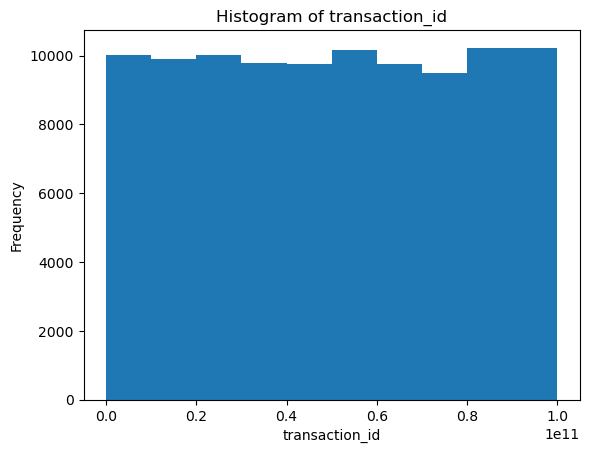

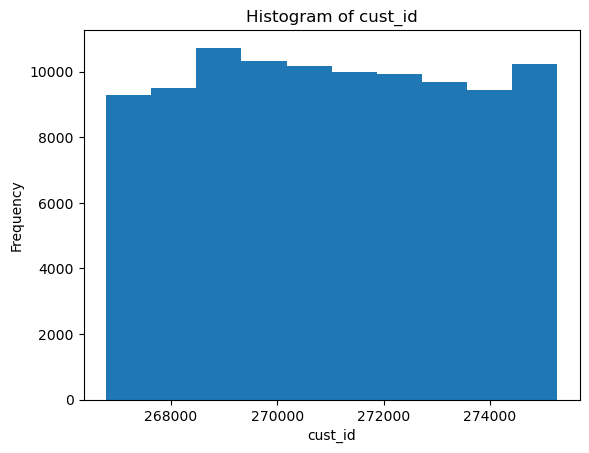

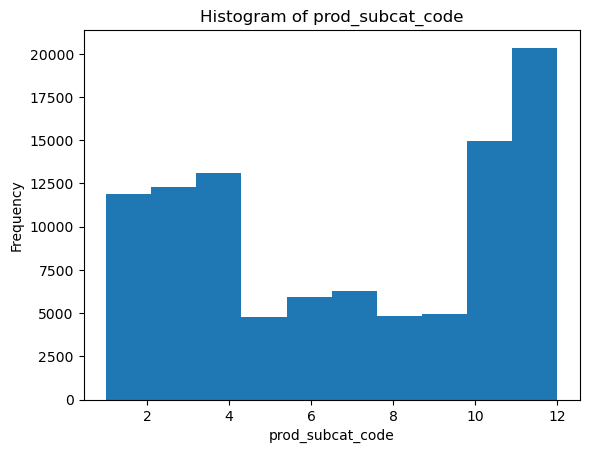

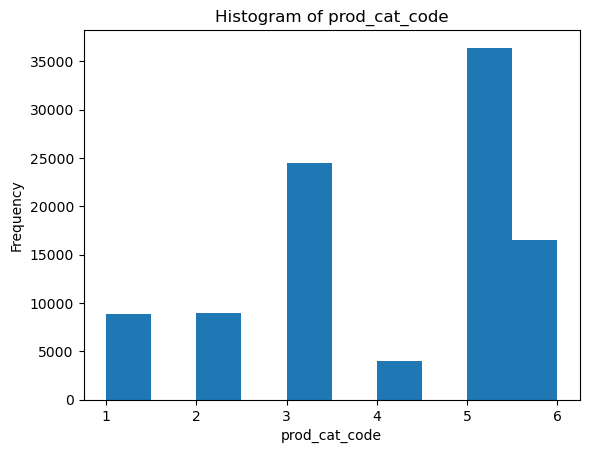

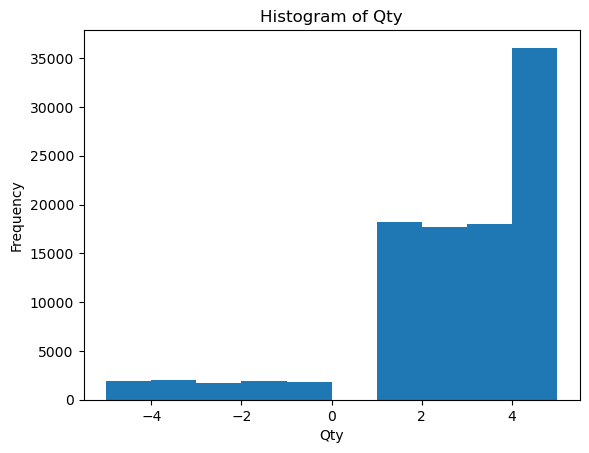

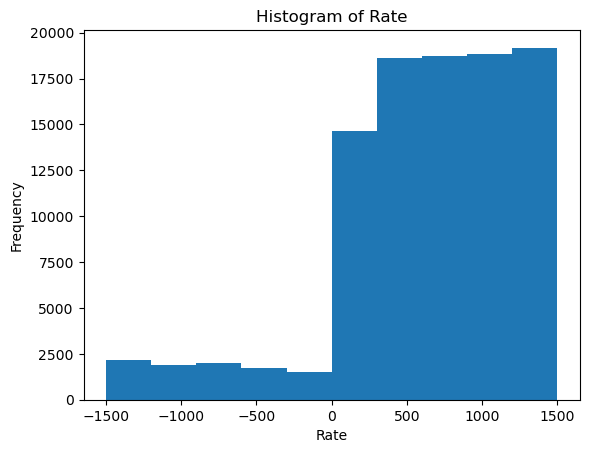

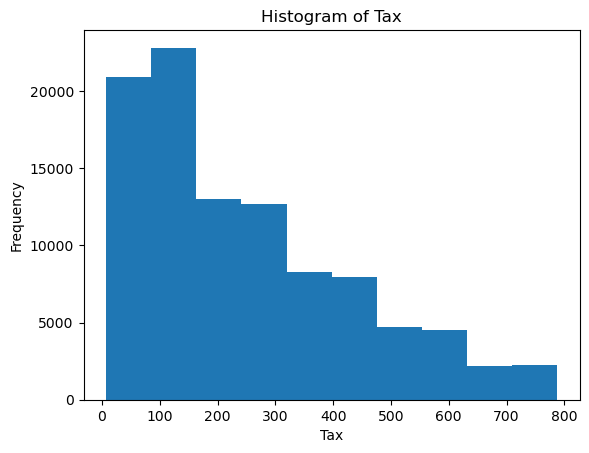

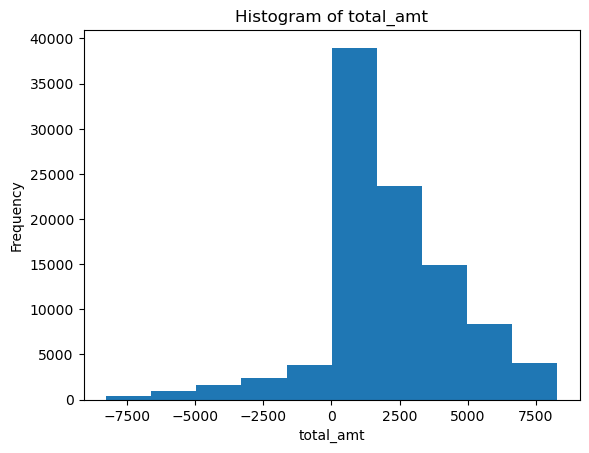

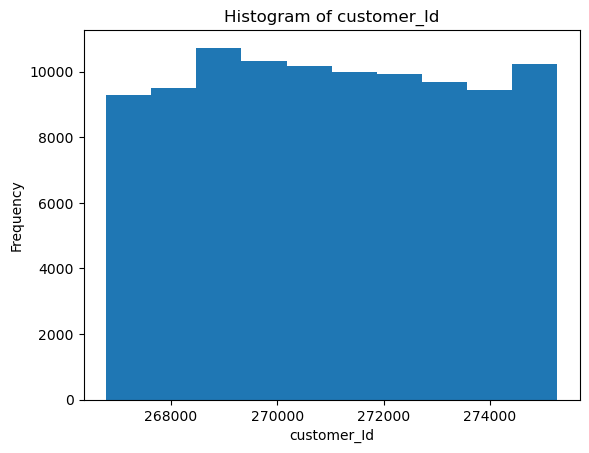

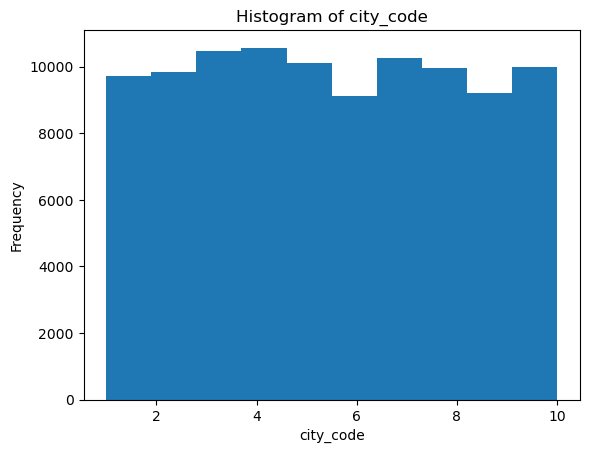

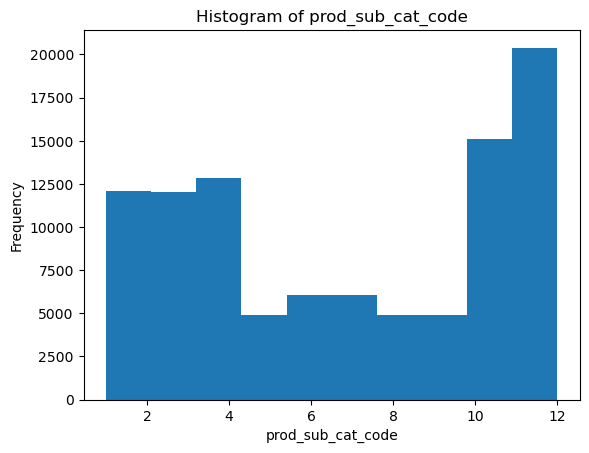

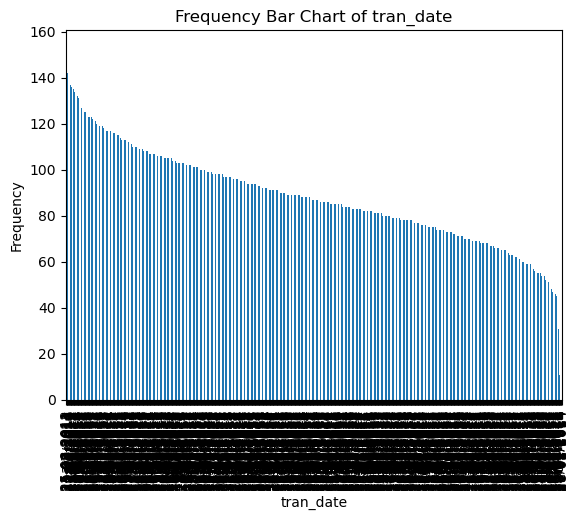

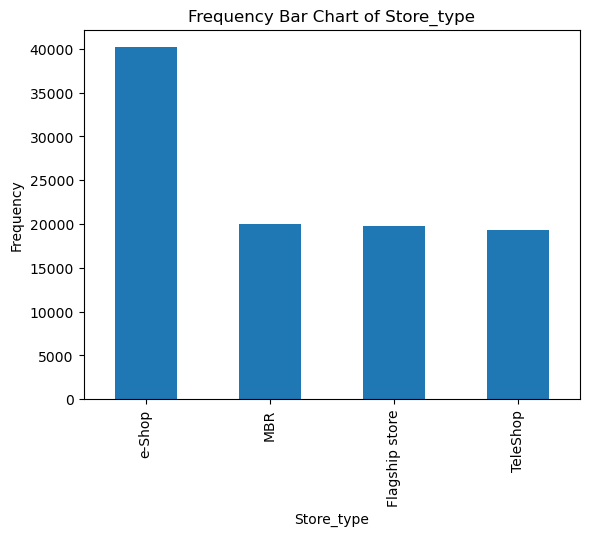

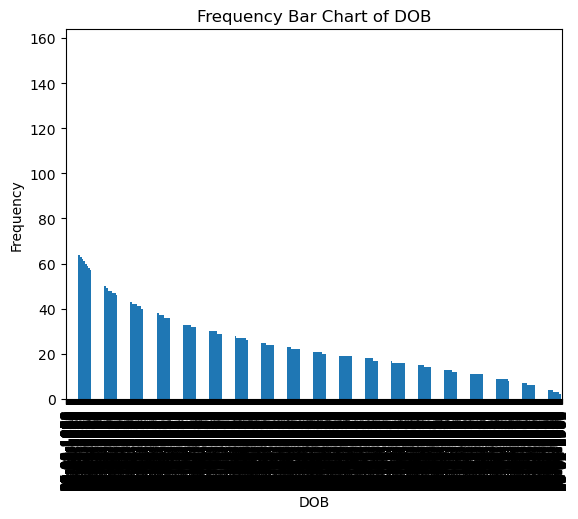

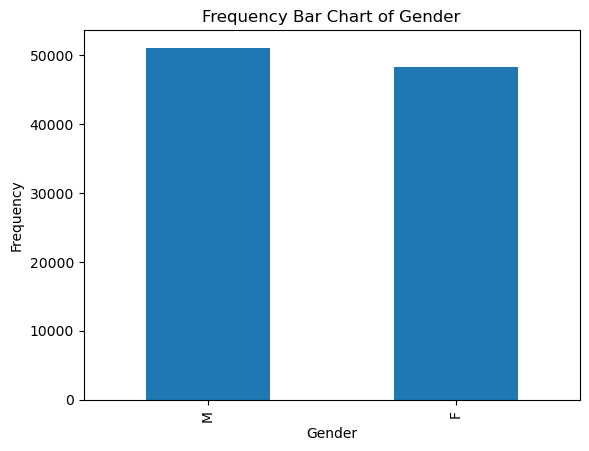

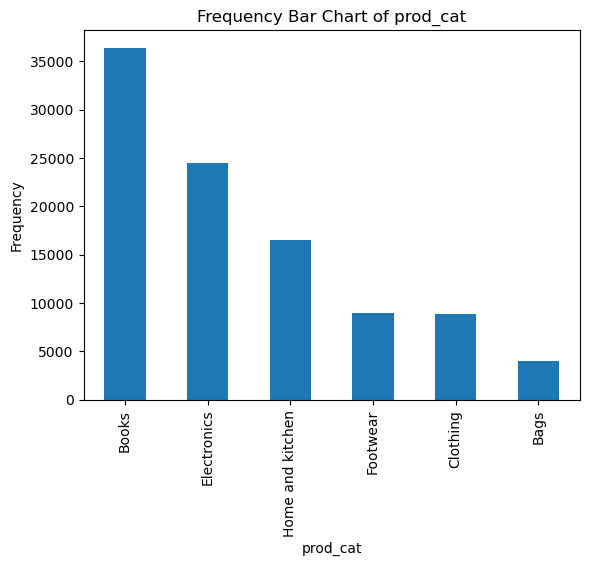

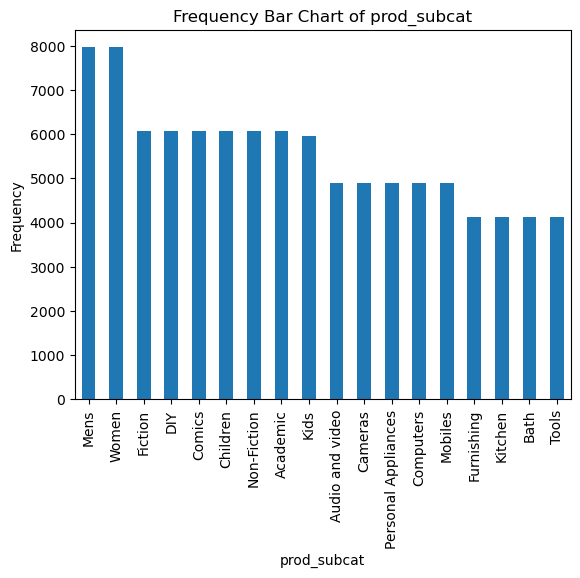

In [12]:
# Get continuous and categorical variables
continuous_vars = customer_final.select_dtypes(include='number').columns
categorical_vars = customer_final.select_dtypes(include='object').columns

# Generate histograms for continuous variables
for var in continuous_vars:
    plt.figure()
    customer_final[var].plot.hist(bins=10)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + var)

# Generate frequency bars for categorical variables
for var in categorical_vars:
    plt.figure()
    freq_table = customer_final[var].value_counts()
    freq_table.plot.bar()
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title('Frequency Bar Chart of ' + var)

plt.show()

4a. Time period of the available transaction data

In [13]:
# Convert 'tran_date' column to datetime type
customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'])

# Calculate the minimum and maximum dates
min_date = customer_final['tran_date'].min()
max_date = customer_final['tran_date'].max()

# Calculate the time period
time_period = max_date - min_date

print("Time period of the available transaction data:")
print("Start Date:", min_date)
print("End Date:", max_date)
print("Time Period:", time_period)

Time period of the available transaction data:
Start Date: 2011-01-02 00:00:00
End Date: 2014-12-02 00:00:00
Time Period: 1430 days 00:00:00


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8320\2550690612.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'])


4b. Count of transactions where the total amount of transaction was negative.

In [14]:
# Filter transactions with negative total amount
negative_transactions = customer_final[customer_final['total_amt'] < 0]

# Get the count of negative transactions
negative_transactions_count = negative_transactions.shape[0]

print("Count of transactions where the total amount was negative:", negative_transactions_count)

Count of transactions where the total amount was negative: 9294


5. Analyze which product categories are more popular among females vs male customers

In [16]:
# Group the data by gender and product category
gender_category_popularity = customer_final.groupby(['Gender', 'prod_cat'])['Qty'].sum().reset_index()

# Pivot the table to have gender as rows and product categories as columns
pivot_table = gender_category_popularity.pivot(index='Gender', columns='prod_cat', values='Qty')

# Calculate the total quantity for each gender
pivot_table['Total'] = pivot_table.sum(axis=1)

# Calculate the percentage of each product category for each gender
for col in pivot_table.columns[:-1]:
    pivot_table[col + '_percentage'] = (pivot_table[col] / pivot_table['Total']) * 100

# Display the result
print("Product category popularity among female and male customers:")
print(pivot_table)

Product category popularity among female and male customers:
prod_cat  Bags  Books  Clothing  Electronics  Footwear  Home and kitchen  \
Gender                                                                     
F         4724  42420     10275        29160     11148             19580   
M         4692  45522     11244        32380     10665             20164   

prod_cat   Total  Bags_percentage  Books_percentage  Clothing_percentage  \
Gender                                                                     
F         117307         4.027040         36.161525             8.759068   
M         124667         3.763626         36.514876             9.019227   

prod_cat  Electronics_percentage  Footwear_percentage  \
Gender                                                  
F                      24.857852             9.503269   
M                      25.973193             8.554790   

prod_cat  Home and kitchen_percentage  
Gender                                 
F                   

6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [17]:
# Group the data by city code and count the number of customers in each city
city_customers = customer_final.groupby('city_code')['customer_Id'].count().reset_index()

# Find the city code with the maximum number of customers
max_customers_city = city_customers.loc[city_customers['customer_Id'].idxmax()]

# Calculate the percentage of customers from the maximum customers city
total_customers = len(customer_final)
percentage = (max_customers_city['customer_Id'] / total_customers) * 100

# Display the result
print("City code with the maximum customers:")
print("City Code:", max_customers_city['city_code'])
print("Percentage of customers from that city:", percentage)

City code with the maximum customers:
City Code: 4.0
Percentage of customers from that city: 10.646269122697472


7. Which store type sells the maximum products by value and by quantity?

In [18]:
# Calculate the total value and quantity of products sold by each store type
store_type_value = customer_final.groupby('Store_type')['total_amt'].sum().reset_index()
store_type_quantity = customer_final.groupby('Store_type')['Qty'].sum().reset_index()

# Find the store type that sells the maximum products by value
max_value_store = store_type_value.loc[store_type_value['total_amt'].idxmax()]

# Find the store type that sells the maximum products by quantity
max_quantity_store = store_type_quantity.loc[store_type_quantity['Qty'].idxmax()]

# Display the results
print("Store type that sells the maximum products by value:")
print("Store Type:", max_value_store['Store_type'])

print("\nStore type that sells the maximum products by quantity:")
print("Store Type:", max_quantity_store['Store_type'])

Store type that sells the maximum products by value:
Store Type: e-Shop

Store type that sells the maximum products by quantity:
Store Type: e-Shop


8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [19]:
# Filter the dataset for transactions from Flagship Stores and the specified product categories
flagship_transactions = customer_final[(customer_final['Store_type'] == 'Flagship store') & 
                                       (customer_final['prod_cat'].isin(['Electronics', 'Clothing']))]

# Calculate the total amount earned
total_amount = flagship_transactions['total_amt'].sum()

# Display the result
print("Total amount earned from Electronics and Clothing categories in Flagship Stores:", total_amount)

Total amount earned from Electronics and Clothing categories in Flagship Stores: 14658949.89


9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [20]:
# Filter the dataset for transactions from "Male" customers and the "Electronics" category
male_electronics_transactions = customer_final[(customer_final['Gender'] == 'M') & 
                                               (customer_final['prod_cat'] == 'Electronics')]

# Calculate the total amount earned
total_amount = male_electronics_transactions['total_amt'].sum()

# Display the result
print("Total amount earned from Electronics category by Male customers:", total_amount)

Total amount earned from Electronics category by Male customers: 28515547.125


10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [21]:
# Remove transactions with negative amounts
positive_transactions = customer_final[customer_final['total_amt'] > 0]

# Group the dataset by customer ID and count unique transactions
unique_transactions = positive_transactions.groupby('customer_Id')['transaction_id'].nunique()

# Filter customers with more than 10 unique transactions
customers_with_more_than_10_transactions = unique_transactions[unique_transactions > 10]

# Get the count of customers
num_customers = len(customers_with_more_than_10_transactions)

# Display the result
print("Number of customers with more than 10 unique transactions:", num_customers)

Number of customers with more than 10 unique transactions: 6


In [22]:
# Filter the dataset for customers aged between 25 - 35
age_filter = (customer_final['DOB'] >= '1990-01-01') & (customer_final['DOB'] <= '2000-12-31')
customers_25_35 = customer_final[age_filter]

# Filter the dataset for transactions in "Electronics" and "Books" categories
category_filter = customer_final['prod_cat'].isin(['Electronics', 'Books'])
selected_transactions = customers_25_35[category_filter]

# Calculate the total amount spent
total_amount_spent = selected_transactions['total_amt'].sum()

# Display the result
print("Total amount spent for Electronics and Books by customers aged between 25 - 35:", total_amount_spent)

Total amount spent for Electronics and Books by customers aged between 25 - 35: 4408682.59


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8320\1043900124.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  selected_transactions = customers_25_35[category_filter]


11b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [23]:
# Filter the dataset for transactions between 1st Jan, 2014 to 1st Mar, 2014
date_filter = (customer_final['tran_date'] >= '2014-01-01') & (customer_final['tran_date'] <= '2014-03-01')
selected_transactions = customer_final[date_filter]

# Calculate the total amount spent
total_amount_spent = selected_transactions['total_amt'].sum()

# Display the result
print("Total amount spent by customers aged between 25 - 35 between 1st Jan, 2014 to 1st Mar, 2014:", total_amount_spent)

Total amount spent by customers aged between 25 - 35 between 1st Jan, 2014 to 1st Mar, 2014: 6033290.055000001
